### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Import crypto data for 15th April 2023 (Previous day data for calibration)

In [2]:
BTCy = yf.download('BTC-USD', start='2023-04-15', end='2023-04-16',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTCy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-15 00:00:00,30490.750000,30490.750000,30490.750000,30490.750000,30490.750000,0
2023-04-15 00:01:00,30491.595703,30491.595703,30491.595703,30491.595703,30491.595703,0
2023-04-15 00:02:00,30489.484375,30489.484375,30489.484375,30489.484375,30489.484375,0
2023-04-15 00:03:00,30480.996094,30480.996094,30480.996094,30480.996094,30480.996094,0
2023-04-15 00:06:00,30478.814453,30478.814453,30478.814453,30478.814453,30478.814453,0
...,...,...,...,...,...,...
2023-04-15 23:53:00,30311.345703,30311.345703,30311.345703,30311.345703,30311.345703,0
2023-04-15 23:54:00,30315.400391,30315.400391,30315.400391,30315.400391,30315.400391,0
2023-04-15 23:55:00,30323.533203,30323.533203,30323.533203,30323.533203,30323.533203,0


In [4]:
ETHy = yf.download('ETH-USD', start='2023-04-15', end='2023-04-16',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETHy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-15 00:00:00,2101.616455,2101.616455,2101.616455,2101.616455,2101.616455,0
2023-04-15 00:01:00,2101.949463,2101.949463,2101.949463,2101.949463,2101.949463,0
2023-04-15 00:02:00,2101.617432,2101.617432,2101.617432,2101.617432,2101.617432,865280
2023-04-15 00:03:00,2100.147461,2100.147461,2100.147461,2100.147461,2100.147461,0
2023-04-15 00:06:00,2097.876465,2097.876465,2097.876465,2097.876465,2097.876465,0
...,...,...,...,...,...,...
2023-04-15 23:53:00,2092.532227,2092.532227,2092.532227,2092.532227,2092.532227,641536
2023-04-15 23:54:00,2092.785889,2092.785889,2092.785889,2092.785889,2092.785889,0
2023-04-15 23:55:00,2093.330811,2093.330811,2093.330811,2093.330811,2093.330811,0


In [6]:
lr1 = np.log(BTCy['Adj Close'] / BTCy['Adj Close'].shift(1))
lr2 = np.log(ETHy['Adj Close'] / ETHy['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1440
mu_2 = lr2.mean() * 1440
sigma_1 = lr1.std() * np.sqrt(1440)
sigma_2 = lr2.std() * np.sqrt(1440)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(BTCy)

In [7]:
rho

0.8292927307470052

In [8]:
result = linregress(np.log(BTCy['Adj Close']), np.log(ETHy['Adj Close']))
beta = result.slope

In [9]:
beta

0.47111762044768835

### Download 16th April data

In [10]:
BTC = yf.download('BTC-USD', start='2023-04-16', end='2023-04-17',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [11]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-16 00:00:00,30315.976562,30315.976562,30315.976562,30315.976562,30315.976562,0
2023-04-16 00:01:00,30314.509766,30314.509766,30314.509766,30314.509766,30314.509766,0
2023-04-16 00:02:00,30316.312500,30316.312500,30316.312500,30316.312500,30316.312500,0
2023-04-16 00:03:00,30313.140625,30313.140625,30313.140625,30313.140625,30313.140625,0
2023-04-16 00:04:00,30313.685547,30313.685547,30313.685547,30313.685547,30313.685547,0
...,...,...,...,...,...,...
2023-04-16 23:54:00,30318.169922,30318.169922,30318.169922,30318.169922,30318.169922,9817088
2023-04-16 23:55:00,30314.941406,30314.941406,30314.941406,30314.941406,30314.941406,2395136
2023-04-16 23:56:00,30310.357422,30310.357422,30310.357422,30310.357422,30310.357422,1646592


In [12]:
ETH = yf.download('ETH-USD', start='2023-04-16', end='2023-04-17',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [13]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-16 00:00:00,2092.281006,2092.281006,2092.281006,2092.281006,2092.281006,0
2023-04-16 00:01:00,2091.677979,2091.677979,2091.677979,2091.677979,2091.677979,0
2023-04-16 00:02:00,2091.657227,2091.657227,2091.657227,2091.657227,2091.657227,0
2023-04-16 00:03:00,2091.218994,2091.218994,2091.218994,2091.218994,2091.218994,0
2023-04-16 00:04:00,2091.595215,2091.595215,2091.595215,2091.595215,2091.595215,0
...,...,...,...,...,...,...
2023-04-16 23:54:00,2119.458740,2119.458740,2119.458740,2119.458740,2119.458740,1374208
2023-04-16 23:55:00,2119.846924,2119.846924,2119.846924,2119.846924,2119.846924,8665600
2023-04-16 23:56:00,2119.737793,2119.737793,2119.737793,2119.737793,2119.737793,909824


In [14]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]
M = len(BTC)

In [15]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

### Simulation of co-integration

In [16]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
T = 1
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]


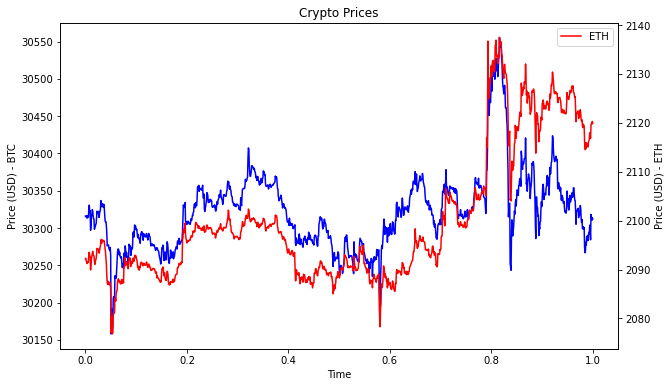

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(tt, S1, 'b', lw=1.5, label='BTC')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (USD) - BTC')
ax1.tick_params(axis='y')

ax2.plot(tt, S2, 'r', lw=1.5, label='ETH')
ax2.set_ylabel('Price (USD) - ETH')
ax2.tick_params(axis='y')

plt.title('Crypto Prices')
plt.legend(loc=0)
plt.show()


Text(0.5, 1.0, 'z')

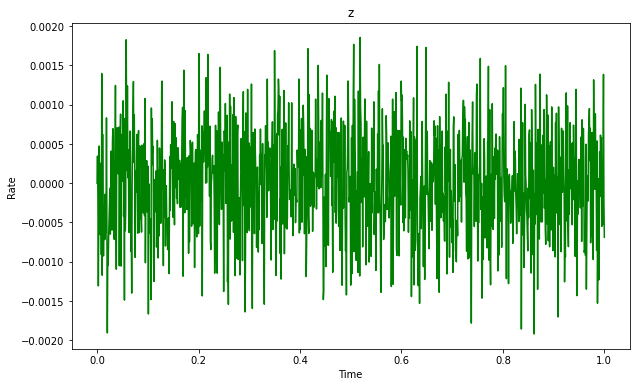

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

# Trading strategy

In [19]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

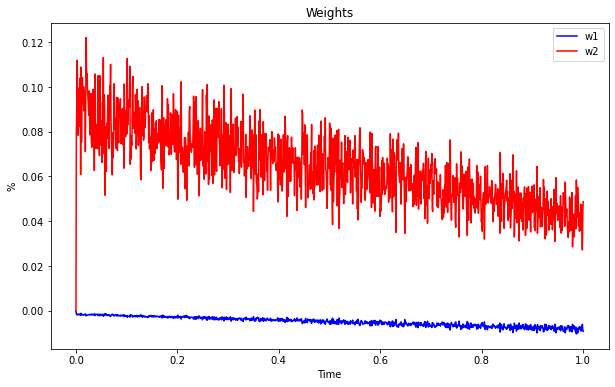

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

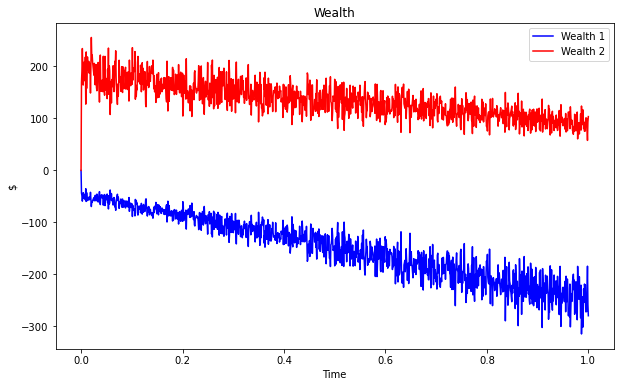

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [22]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

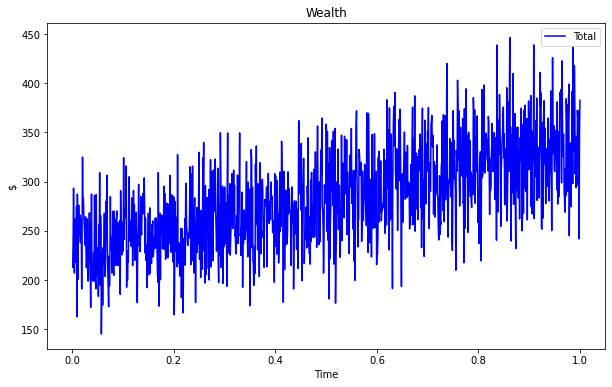

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [24]:
Pi_1.mean()

-0.0048753276902237875

In [25]:
 Pi_2.mean()

0.06443585163473432

Text(0.5, 1.0, 'Comparison')

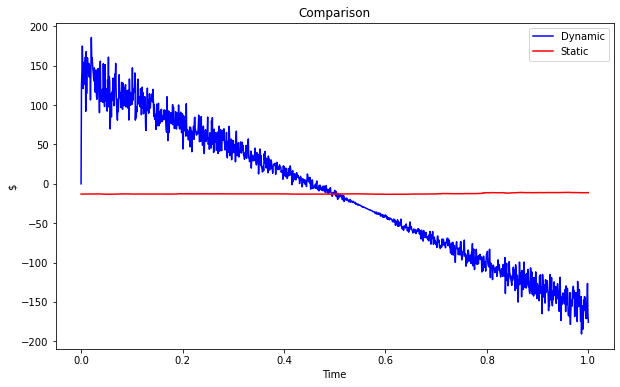

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

### Return

In [27]:
Wealth[1]   # Inital Wealth

array([212.84493908])

In [28]:
Wealth[-1]  # Ending Wealth

array([382.72907544])

In [29]:
Return = (Wealth[-1] - Wealth[1])/Wealth[1]  # Return
Return.item()

0.7981591533294746

### Simulation

In [30]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * len(BTC)
mu_2 = lr2.mean() * len(ETH)
sigma_1 = lr1.std() * np.sqrt(len(BTC))
sigma_2 = lr2.std() * np.sqrt(len(ETH))
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(BTC)

In [31]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [32]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))


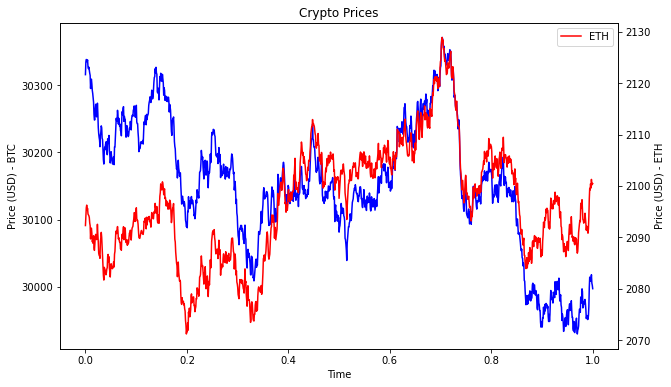

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(tt, S1, 'b', lw=1.5, label='BTC')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (USD) - BTC')
ax1.tick_params(axis='y')

ax2.plot(tt, S2, 'r', lw=1.5, label='ETH')
ax2.set_ylabel('Price (USD) - ETH')
ax2.tick_params(axis='y')

plt.title('Crypto Prices')
plt.legend(loc=0)
plt.show()

Text(0.5, 1.0, 'z')

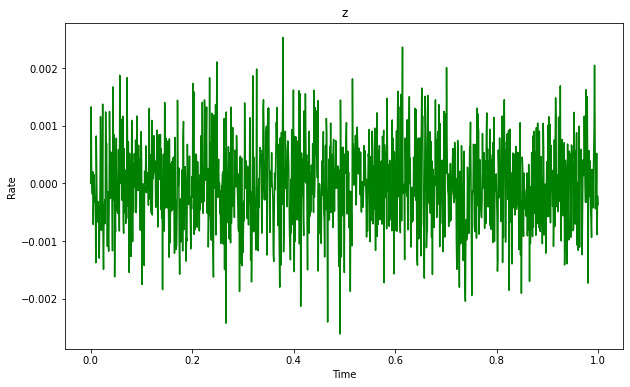

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [35]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]))


Text(0.5, 1.0, 'Weights')

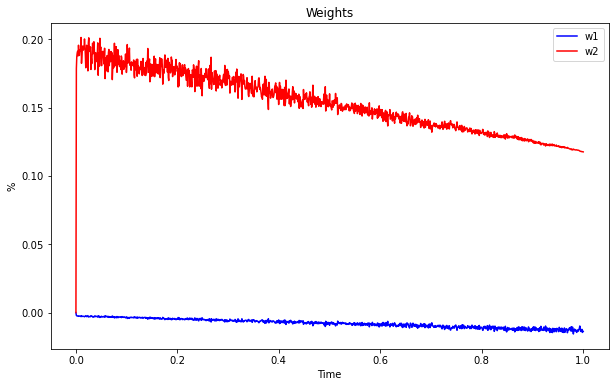

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

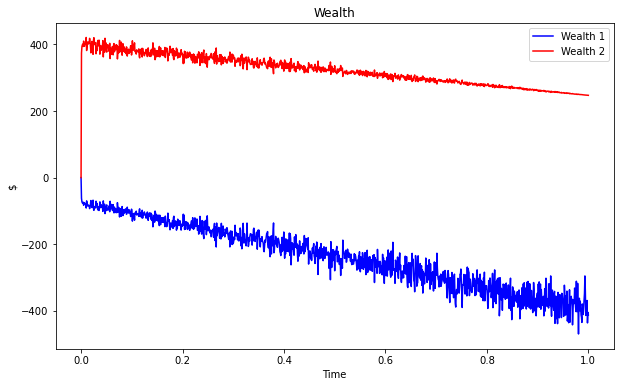

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [38]:
Pi_1.mean()

-0.007822500568156131

In [39]:
Pi_2.mean()

0.15358029426395584

Text(0.5, 1.0, 'Comparison')

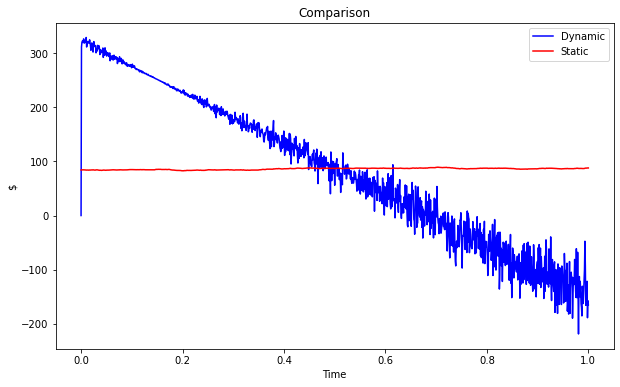

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [41]:
Wealth[1]   # Inital Wealth

array([212.84493908])

In [42]:
Wealth[-1]  # Ending Wealth

array([382.72907544])

In [43]:
Return = (Wealth[-1] - Wealth[1])/Wealth[1]  # Return
Return.item()

0.7981591533294746

In [44]:
mu_1

-0.000129677616873466

In [45]:
mu_2

0.01312138873029023

In [46]:
sigma_1

0.012204095487237802

In [47]:
sigma_2

0.021711964157031936

In [48]:
beta

0.47111762044768835